## Importando as bibliotecas

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1. Coleta de dados

In [4]:
# Lendos os arquivos com enconding e separadores

df_dados_clinicos = pd.read_csv('../data/dados_clinicos.csv', 
                                sep='|', 
                                encoding='latin1')

df_dados_pacientes = pd.read_csv('../data/dados_pacientes.csv', 
                                sep=';', 
                                encoding='latin1')

df_dados_estado = pd.read_csv('../data/estado_regiao.csv', 
                                sep=';', 
                                encoding='latin1')

## 2. Analise  Tratamento dos Dados

### 2.1 Analise e Tratamento dataset: Dados Clinicos

In [5]:
df_dados_clinicos.head()

,id_cliente,peso,colesterol,genero
0,1,152.7,203.9,Masculino
1,2,184.8,233.8,Masculino
2,3,152.1,210.4,Masculino
3,4,139.8,196.8,Masculino
4,5,182.4,215.8,Feminino


In [6]:
df_dados_clinicos.shape

#observado pelo shape que se trata de 10301 linhas e 4 colunas

(10301, 4)

In [7]:
# pelo info foi verificado que há dados nulos no dataset
df_dados_clinicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10301 entries, 0 to 10300
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  10301 non-null  int64  
 1   peso        10288 non-null  float64
 2   colesterol  10301 non-null  float64
 3   genero      10291 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 322.0+ KB


In [8]:
# checando tbm se há linha duplicadas, visto que se trata de dados por id do cliente

print(df_dados_clinicos['id_cliente'].duplicated().sum())

# foi observado 301 linhas duplicadas de id do cliente

301


In [9]:
# identificando e dropando linhas duplicadas
# por se tratar de duplicacao, optou-se por excluir as linhas duplicadas do dataset para se trabalhar apenas com dados unicos

ids_dados_clinicos_duplicados = df_dados_clinicos['id_cliente'].value_counts()
ids_dados_clinicos_duplicados = ids_dados_clinicos_duplicados[ids_dados_clinicos_duplicados > 1].index.tolist()
#fiz a consulta na tabela de todos os dados que aparecem mais de uma vez e adicionei a uma lista com o indice desses dados
print(ids_dados_clinicos_duplicados)
dados_clinicos_duplicados = df_dados_clinicos[df_dados_clinicos['id_cliente'].isin(ids_dados_clinicos_duplicados)]
dados_clinicos_duplicados.sort_values(by='id_cliente')
# com a lista criada eu fiz consulta no meu dataset das linhas que conicindem com minha lista de indices
print(dados_clinicos_duplicados)
df_dados_clinicos = df_dados_clinicos.drop_duplicates(subset='id_cliente', keep='first')
df_dados_clinicos.shape
# fiz o drop dos valores duplicados e verifiquei o novo shape


[1251, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1300, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 106

(10000, 4)

In [10]:
# checando a quantidade de nulos por colunas
df_dados_clinicos.isnull().sum().reset_index()

#como pode ser observado há 10 dados nulos na colunas genereo e 13 na coluna peso

,index,0
0,id_cliente,0
1,peso,13
2,colesterol,0
3,genero,10


In [11]:
# tratando os dados nulos com mediana, caso a coluna seja numeriaca e com a moda caso seja categorica

for coluna in df_dados_clinicos.select_dtypes(include=['float64', 'int64']):
    mediana = df_dados_clinicos[coluna].median()
    df_dados_clinicos[coluna] = df_dados_clinicos[coluna].fillna(mediana)

for coluna in df_dados_clinicos.select_dtypes(include=['object']):
    moda = df_dados_clinicos[coluna].mode()[0]
    df_dados_clinicos[coluna] = df_dados_clinicos[coluna].fillna(moda)

df_dados_clinicos.isnull().sum().reset_index()


,index,0
0,id_cliente,0
1,peso,0
2,colesterol,0
3,genero,0


### 2.2 Analise e Tratamento dataset: Dados Paciente

In [12]:
df_dados_pacientes.head()
# observei que o encoding latin1 nao esta ideal para esses dados, vou usar o utf-8


,ï»¿id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
0,1,39,Servidor PÃºblico,Ensino MÃ©dio Completo,2,Solteiro,Branco,2.0,4754
1,2,50,AutÃ´nomo,Superior Incompleto,24,Casado,Branco,1.0,3923
2,3,38,FuncionÃ¡rio Setor Privado,Ensino MÃ©dio Incompleto,4,Divorciado,Branco,0.0,1100
3,4,53,FuncionÃ¡rio Setor Privado,Ensino MÃ©dio Incompleto,24,Casado,Negro,1.0,1100
4,5,28,FuncionÃ¡rio Setor Privado,Ensino MÃ©dio Completo,15,Casado,Negro,0.0,3430


In [13]:
df_dados_pacientes = pd.read_csv('../data/dados_pacientes.csv', 
                                sep=';', 
                                encoding='utf-8')

df_dados_pacientes.head()

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.0,1100
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.0,3430


In [14]:
df_dados_pacientes.shape
#observado pelo shape que se trata de 8084 linhas e 9 colunas

(8084, 9)

In [15]:
# pelo info foi verificado que há dados nulos no dataset
df_dados_pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8084 entries, 0 to 8083
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_cliente       8084 non-null   int64  
 1   idade            8084 non-null   int64  
 2   classe_trabalho  7690 non-null   object 
 3   escolaridade     8084 non-null   object 
 4   id_estado        8084 non-null   int64  
 5   estado_civil     8084 non-null   object 
 6   raca             8084 non-null   object 
 7   qtde_filhos      8074 non-null   float64
 8   salario          8084 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 568.5+ KB


In [16]:
# Checando linhas duplicadas
# Verificando duplicação por id_cliente

print(df_dados_pacientes['id_cliente'].duplicated().sum())

# foi observado 85 linhas

85


In [17]:
# identificando e dropando linhas duplicadas
# por se tratar de duplicacao, optou-se por excluir as linhas duplicadas do dataset para se trabalhar apenas com dados unicos

ids_dados_pacientes_duplicados = df_dados_pacientes['id_cliente'].value_counts()
ids_dados_pacientes_duplicados = ids_dados_pacientes_duplicados[ids_dados_pacientes_duplicados > 1].index.tolist()
#fiz a consulta na tabela de todos os dados que aparecem mais de uma vez e adicionei a uma lista com o indice desses dados
print(ids_dados_pacientes_duplicados)
dados_pacientes_duplicados = df_dados_pacientes[df_dados_pacientes['id_cliente'].isin(ids_dados_pacientes_duplicados)]
dados_pacientes_duplicados.sort_values(by='id_cliente')
# com a lista criada eu fiz consulta no meu dataset das linhas que conicindem com minha lista de indices
print(dados_pacientes_duplicados)
df_dados_pacientes = df_dados_pacientes.drop_duplicates(subset='id_cliente', keep='first')
df_dados_pacientes.shape
# fiz o drop dos valores duplicados e verifiquei o novo shape


[511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510]
     id_cliente  idade            classe_trabalho  \
471         472     17             Menor Aprendiz   
472         473     22  Funcionário Setor Privado   
473         474     27  Funcionário Setor Privado   
474         475     23  Funcionário Setor Privado   
475         476     33  Funcionário Setor Privado   
..          ...    ...                        ...   
636         552     30  Funcionário Setor Privado   
637         553     28  Funcionário Setor Privado   
638         554     54  Funcionário Setor Privado   
639         555     47  Funcionário Setor Pr

(7999, 9)

In [18]:
# checando a quantidade de nulos por colunas
df_dados_pacientes.isnull().sum().reset_index()

#como pode ser observado há 387 dados nulos na colunas classe trabalho e 10 na coluna qtd-filhos

,index,0
0,id_cliente,0
1,idade,0
2,classe_trabalho,387
3,escolaridade,0
4,id_estado,0
5,estado_civil,0
6,raca,0
7,qtde_filhos,10
8,salario,0


In [19]:
# tratando os dados nulos com mediana, caso a coluna seja numeriaca e com a moda caso seja categorica

for coluna in df_dados_pacientes.select_dtypes(include=['float64', 'int64']):
    mediana = df_dados_pacientes[coluna].median()
    df_dados_pacientes[coluna] = df_dados_pacientes[coluna].fillna(mediana)

for coluna in df_dados_pacientes.select_dtypes(include=['object']):
    moda = df_dados_pacientes[coluna].mode()[0]
    df_dados_pacientes[coluna] = df_dados_pacientes[coluna].fillna(moda)

df_dados_pacientes.isnull().sum().reset_index()

,index,0
0,id_cliente,0
1,idade,0
2,classe_trabalho,0
3,escolaridade,0
4,id_estado,0
5,estado_civil,0
6,raca,0
7,qtde_filhos,0
8,salario,0


### 2.3 Analise e Tratamento dataset: Dados Estado Regiao

In [20]:
df_dados_estado.head()

,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil
3,4,AM,Amazonas,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil


In [21]:
df_dados_estado.shape
# observado 36 linhas e 5 colunas

(36, 5)

In [22]:
# pelo info foi verificado que não há dados nulos no dataset
df_dados_estado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_estado  36 non-null     int64 
 1   sigla      36 non-null     object
 2   estado     36 non-null     object
 3   regiao     36 non-null     object
 4   pais       36 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.5+ KB


In [23]:
# Checando linhas duplicadas
# Verificando duplicação por id_estado  

print(df_dados_estado['id_estado'].duplicated().sum())

# foi observado 9 linhas

9


In [24]:
# identificando e dropando linhas duplicadas
# por se tratar de duplicacao, optou-se por excluir as linhas duplicadas do dataset para se trabalhar apenas com dados unicos

ids_dados_estado_duplicados = df_dados_estado['id_estado'].value_counts()
ids_dados_estado_duplicados = ids_dados_estado_duplicados[ids_dados_estado_duplicados > 1].index.tolist()
#fiz a consulta na tabela de todos os dados que aparecem mais de uma vez e adicionei a uma lista com o indice desses dados
print(ids_dados_estado_duplicados)
dados_estados_duplicados = df_dados_estado[df_dados_estado['id_estado'].isin(ids_dados_estado_duplicados)]
dados_estados_duplicados.sort_values(by='id_estado')
# com a lista criada eu fiz consulta no meu dataset das linhas que conicindem com minha lista de indices
print(dados_estados_duplicados)
df_dados_estado = df_dados_estado.drop_duplicates(subset='id_estado', keep='first')
df_dados_estado.shape
# fiz o drop dos valores duplicados e verifiquei o novo shape

[10, 11, 12, 15, 18, 17, 16, 13, 14]
    id_estado sigla              estado        regiao    pais
9          10    MA            Maranhão      Nordeste  Brasil
10         11    MT         Mato Grosso  Centro-Oeste  Brasil
11         12    MS  Mato Grosso do Sul  Centro-Oeste  Brasil
12         13    MG        Minas Gerais       Sudeste  Brasil
13         14    PA                Pará         Norte  Brasil
14         15    PB             Paraíba      Nordeste  Brasil
15         16    PR              Paraná           Sul  Brasil
16         17    PE          Pernambuco      Nordeste  Brasil
17         18    PI               Piauí      Nordeste  Brasil
18         10    MA            Maranhão      Nordeste  Brasil
19         11    MT         Mato Grosso  Centro-Oeste  Brasil
20         12    MS  Mato Grosso do Sul  Centro-Oeste  Brasil
21         13    MG        Minas Gerais       Sudeste  Brasil
22         14    PA                Pará         Norte  Brasil
23         15    PB             P

(27, 5)

### Montando base final unindo os três dataframes tratados

In [33]:
# Montando base final unindo os três dataframes

dados_parciais = pd.merge(
    df_dados_pacientes,
    df_dados_clinicos,
    on='id_cliente',
    how='left',
    validate='1:1'
)

dados_finais = pd.merge(
    dados_parciais,
    df_dados_estado,
    on='id_estado',
    how='left',
    validate='m:1'
)

dados_finais.head()

#cria um arquivo com os dados finais
#dados_finais.to_csv("dados_finais.csv", index=False, encoding="utf-8")

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,peso,colesterol,genero,sigla,estado,regiao,pais
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754,152.7,203.9,Masculino,AL,Alagoas,Nordeste,Brasil
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923,184.8,233.8,Masculino,SC,Santa Catarina,Sul,Brasil
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100,152.1,210.4,Masculino,AM,Amazonas,Norte,Brasil
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.0,1100,139.8,196.8,Masculino,SC,Santa Catarina,Sul,Brasil
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.0,3430,182.4,215.8,Feminino,PB,Paraíba,Nordeste,Brasil


## Criar representações gráficas dos dados

<Axes: xlabel='idade', ylabel='Count'>

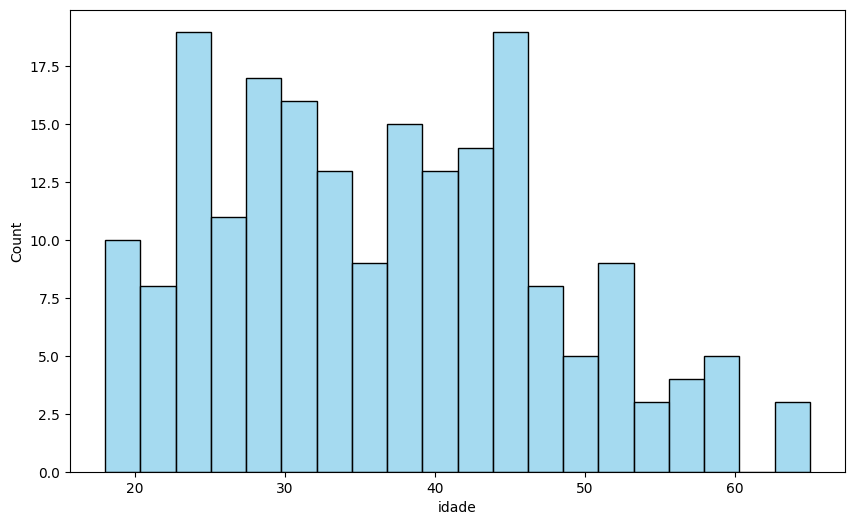

In [26]:
# Histograma das idades de todas as pessoas que residem no estado de São Paulo e trabalham no setor privado.

dados_finais['classe_trabalho'].unique()

dados_sp_privado = dados_finais[
    (dados_finais['sigla'] == 'SP') &
    (dados_finais['classe_trabalho'] == 'Funcionário Setor Privado')
]

plt.figure(figsize=(10, 6))
sns.histplot(
    data=dados_sp_privado,
    x='idade',
    bins=20,
    kde=False,
    color='skyblue',
    edgecolor='black'
)

<Axes: xlabel='raca', ylabel='salario'>

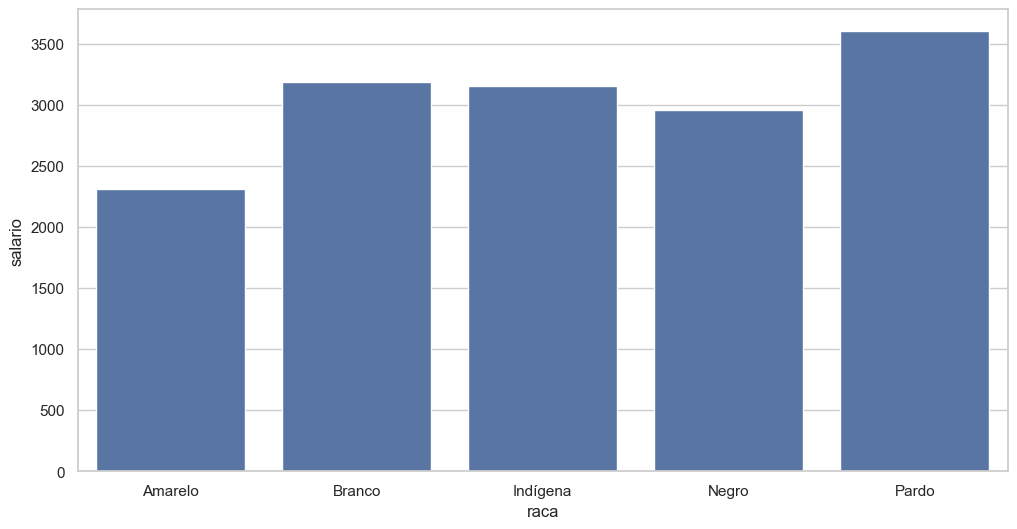

In [27]:
# Média salarial por raça
media_salarial_por_raca = dados_finais.groupby('raca')['salario'].mean().reset_index()
media_salarial_por_raca

sns.set_theme(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.barplot(
    x='raca',
    y='salario',
    data=media_salarial_por_raca,
    estimator='mean',
    errorbar=None
)

<Axes: xlabel='raca', ylabel='total'>

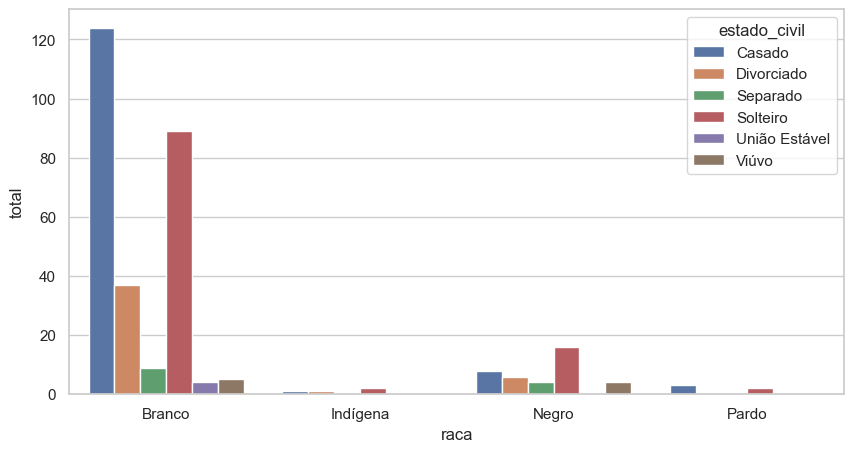

In [28]:
# Distribuição de residentes em Minas Gerais, por estado civil e raça

df_mg = dados_finais[dados_finais['sigla'] == 'MG']
contagem = df_mg.groupby(['estado_civil', 'raca']).size().reset_index(name='total')

sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 5))
sns.barplot(
    x='raca',
    y='total',
    hue='estado_civil',
    data=contagem,
    estimator=sum,
    errorbar=None
)

In [29]:
# Média e desvio padrão do colesterol de pessoas da região Sul com peso superior a 120kg.

sulistas_peso_maior_120 = dados_finais[(dados_finais['peso'] > 120) & (dados_finais['regiao'] == 'Sul')]
print(sulistas_peso_maior_120['colesterol'].mean())
print(sulistas_peso_maior_120['colesterol'].std())

206.95538461538462
21.89061534825628


<Axes: xlabel='peso', ylabel='colesterol'>

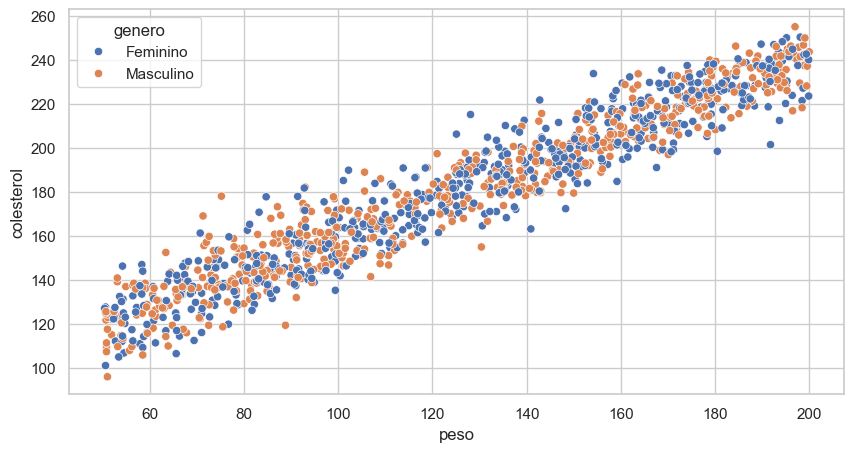

In [30]:
# Peso x Colesterol das pessoas da região Sudeste por gênero.

df = dados_finais[dados_finais['regiao'] == 'Sudeste']
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=df,
    x='peso',
    y='colesterol',
    hue='genero'
)


In [34]:
# Classe de trabalho  com maior número de pessoas

dados_finais['classe_trabalho'].value_counts()

classe_trabalho
Funcionário Setor Privado    5769
Autônomo                      588
Empresário                    496
Servidor Público              299
MEI                           275
Aposentado                    267
Funcionário Público           216
Menor Aprendiz                 85
Desempregado                    3
Estagiário                      1
Name: count, dtype: int64

In [35]:
# Classe de trabalho com maior média de salários para pessoas do PE

df_pe = dados_finais[dados_finais['sigla'] == 'PE']
df_pe.groupby('classe_trabalho')['salario'].mean().reset_index().sort_values(by='salario', ascending=False)

,classe_trabalho,salario
2,Empresário,11871.600000
7,Servidor Público,6381.500000
3,Funcionário Público,6365.625000
0,Aposentado,4139.300000
5,MEI,4098.125000
1,Autônomo,2444.689655
4,Funcionário Setor Privado,2347.574661
6,Menor Aprendiz,1100.000000


<Axes: xlabel='salario', ylabel='classe_trabalho'>

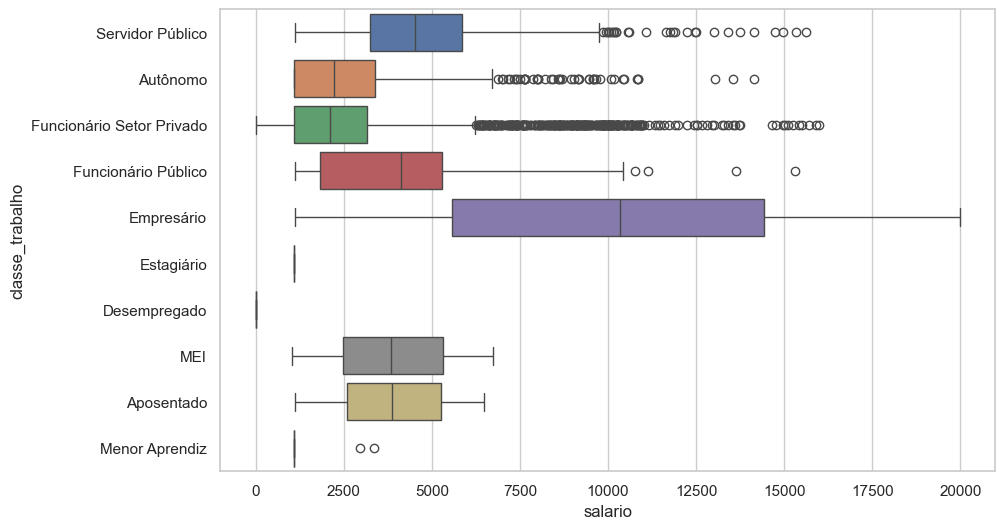

In [36]:


# Boxplot salários por classe de trabalho

sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=dados_finais,
    y='classe_trabalho',
    x='salario',
    hue='classe_trabalho'
)

<Axes: xlabel='idade', ylabel='raca'>

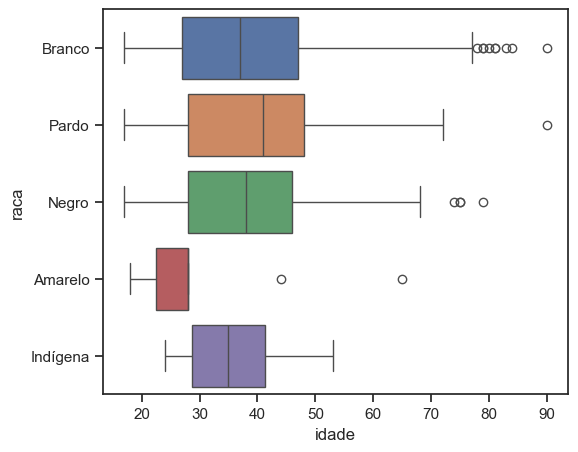

In [37]:
# Boxplot idades por raça

df_sudeste = dados_finais[dados_finais['regiao'] == 'Sudeste']
sns.set_theme(style='ticks')
plt.figure(figsize=(6, 5))
sns.boxplot(
    data=df_sudeste,
    y='raca',
    x='idade',
    hue='raca'
)

In [38]:
# Média salarial de pessoas casadas com Ensino Superior Completo que trabalham como Funcionários do Setor Privado

dados_finais['escolaridade'].unique()
dados_finais[
    (dados_finais['estado_civil'] == 'Casado') &
    (dados_finais['escolaridade'] == 'Superior Completo') &
    (dados_finais['classe_trabalho'] == 'Funcionário Setor Privado')
]['salario'].mean()

np.float64(11025.0)

In [39]:
# Estado civil com menor soma de quantidade de filhos

dados_finais.groupby('estado_civil')['qtde_filhos'].sum().reset_index().sort_values(by='qtde_filhos', ascending=True)



,estado_civil,qtde_filhos
4,União Estável,284.0
5,Viúvo,583.0
2,Separado,669.0
1,Divorciado,2796.0
3,Solteiro,5713.0
0,Casado,9192.0
